In [43]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [45]:
df = pd.read_csv('/Users/zhichengliu/Desktop/Valar.Ga/Self_Learning.nosync/数据/Udemy/Python/UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')

In [9]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [12]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

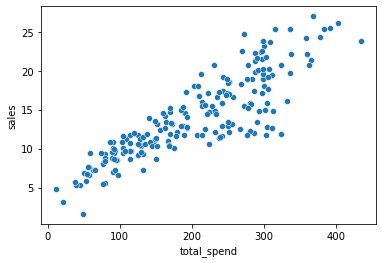

In [13]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

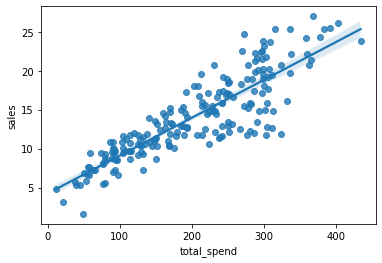

In [14]:
sns.regplot(data = df, x = 'total_spend', y = 'sales')

In [16]:
X = df['total_spend']
y = df['sales']

In [20]:
# y = mx + b
# y = B1x + B0
# help(np.polyfit)

In [21]:
np.polyfit(X,y,deg = 1)

array([0.04868788, 4.24302822])

In [23]:
potential_spend = np.linspace(0,500,100)

In [25]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

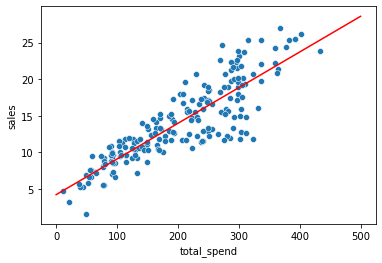

In [30]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
plt.plot(potential_spend,predicted_sales,color = 'red');

In [34]:
spend = 200

predicted_sales =  0.04868788*spend + 4.24302822

In [35]:
predicted_sales

13.98060422

In [36]:
np.polyfit(X,y,deg = 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [38]:
# y = B1x + B0

# y = B3*x**3 + B2*x**2 + B1*x + B0

In [40]:
pot_spend = np.linspace(0,500,100)

In [41]:
pred_sales =   3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend**1 + 2.70495053e+00

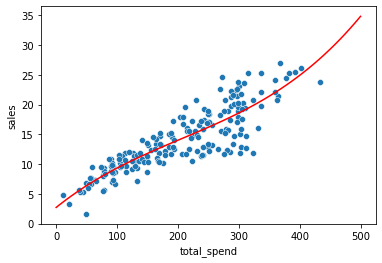

In [42]:
sns.scatterplot(data = df, x = 'total_spend', y = 'sales')
plt.plot(pot_spend,pred_sales,color = 'red');

## Scikit-learn

In [46]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


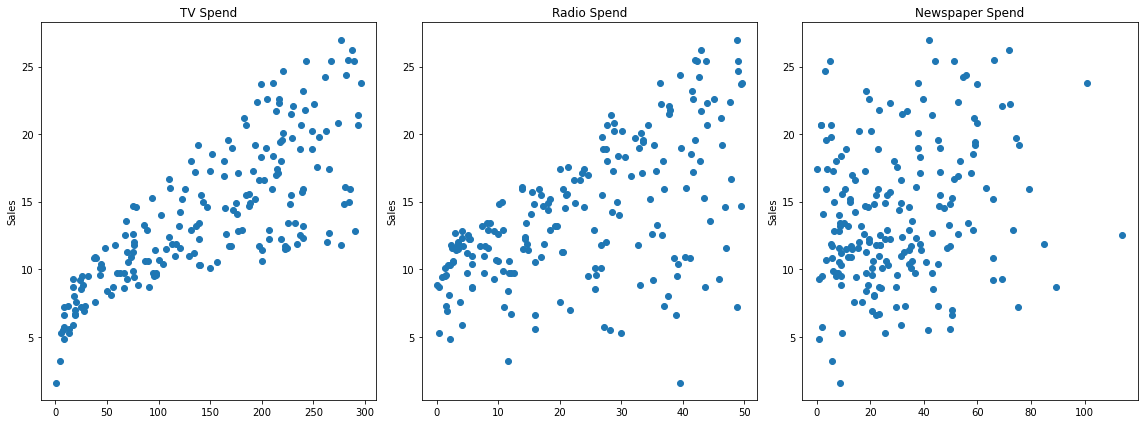

In [47]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

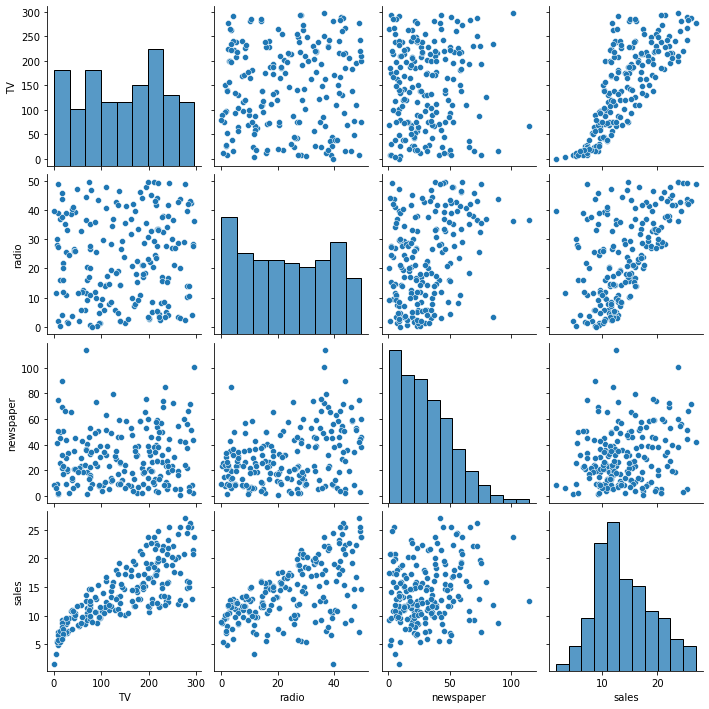

In [49]:
sns.pairplot(df)

In [50]:
X = df.drop('sales',axis=1)

In [51]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [52]:
y = df['sales']

In [53]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
# help(train_test_split)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [119]:
len(df)

200

In [59]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [60]:
 len(X_test)

60

In [61]:
from sklearn.linear_model import LinearRegression

In [122]:
#help(LinearRegression)

In [120]:
model = LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression()

In [72]:
test_predictions = model.predict(X_test) 

In [73]:
test_predictions 

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
df['sales'].mean()

14.022500000000003

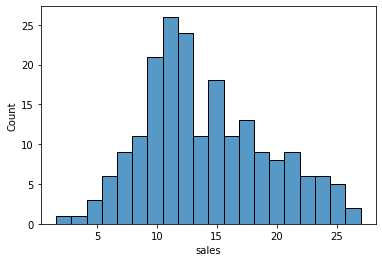

In [79]:
sns.histplot(data=df,x = 'sales',bins =20);

In [80]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144808

In [83]:
np.sqrt(mean_squared_error(y_test,test_predictions)) # RMSE

1.516151937599388

In [84]:
test_residuals = y_test - test_predictions

In [85]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

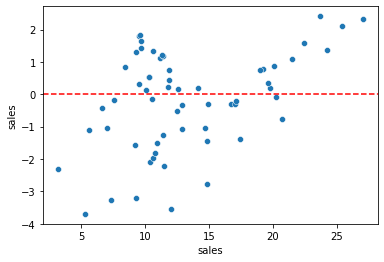

In [90]:
sns.scatterplot(x = y_test, y = test_residuals)
plt.axhline(y=0,color = 'red',ls='--')

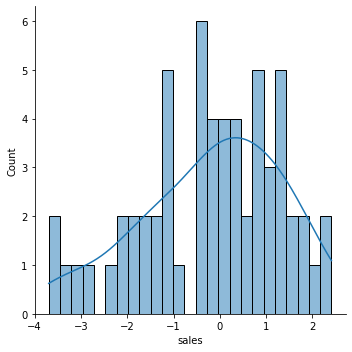

In [91]:
sns.displot(test_residuals,bins=25,kde =True)

In [92]:
import scipy as sp

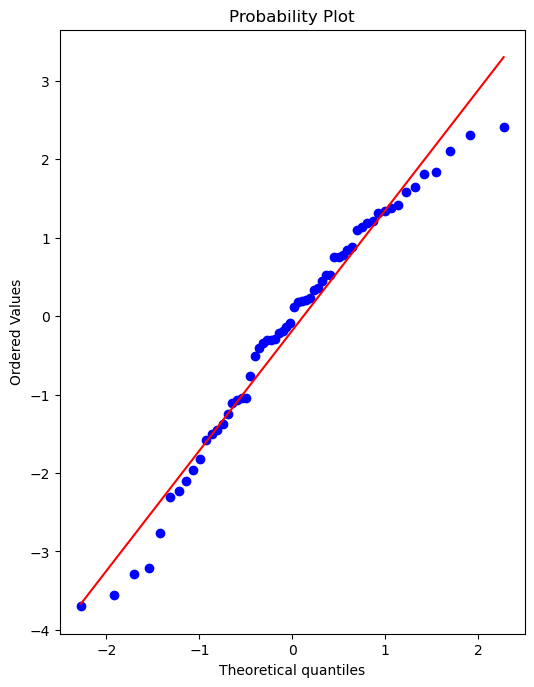

In [95]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [97]:
final_model  = LinearRegression()

In [98]:
final_model.fit(X,y)

LinearRegression()

In [99]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [100]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [101]:
y_hat = final_model.predict(X) 

In [102]:
y_hat

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

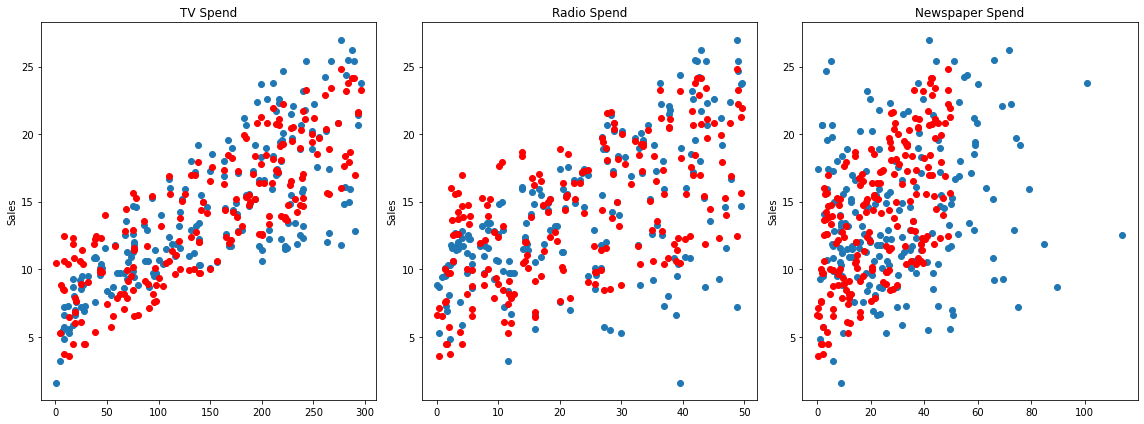

In [103]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [110]:
#from joblib import dump,load

In [111]:
#dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [115]:
#loaded_model = load('final_sales_model.joblib')

In [116]:
X.shape

(200, 3)

In [117]:
# 149 tv, 22 radio, 12 newspaper
campaign = [[149,22,12]]

In [118]:
final_model.predict(campaign)

array([13.893032])